
image 1/1 D:\currency_detection_project\fake_images\500_f1.jpg: 288x640 1 person, 1 potted plant, 94.0ms
Speed: 4.0ms preprocess, 94.0ms inference, 0.0ms postprocess per image at shape (1, 3, 288, 640)
No cats detected.


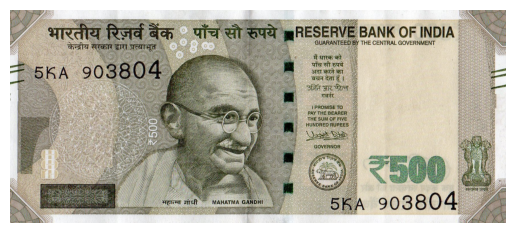

In [16]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

def detect_cats(image_path):
    # Load a pretrained YOLOv8 model
    model = YOLO('yolov8n.pt')  # Use 'yolov8n.pt' for the nano version
    
    # Run inference on the image
    results = model(image_path)
    
    # Load image for visualization
    img = cv2.imread(image_path)

    # List to store cat detections
    cat_boxes = []

    # Process results
    for result in results:
        # Convert tensor array to numpy
        boxes = result.boxes.numpy()
        
        for box in boxes:
            # Get box coordinates
            x1, y1, x2, y2 = box.xyxy[0].astype(int)
            # Get confidence score
            confidence = box.conf[0]
            # Get class id
            class_id = box.cls[0]
            # Get class name
            class_name = model.names[int(class_id)]
            
            # Draw only if it's a cat (class 15 in COCO) and confidence > 0.5
            if class_name == 'cat' and confidence > 0.5:
                cat_boxes.append((x1, y1, x2, y2))  # Store the box
                # Draw rectangle around the cat
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Add label for the detected cat
                label = f'Cat {confidence:.2f}'
                cv2.putText(img, label, (x1, y1-10), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert BGR image to RGB for matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Check if any cats were detected
    if not cat_boxes:
        print("No cats detected.")
    
    # Display the result
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    
    return cat_boxes  # Return only cat boxes

# Use the function
image_path = r'D:\currency_detection_project\fake_images\500_f1.jpg'  # Replace with your image path
results = detect_cats(image_path)



image 1/1 D:\Deep Learning\deep l\dataset\train\cat\augmented_image_619.jpg: 640x480 1 cat, 1 bed, 94.5ms
Speed: 3.9ms preprocess, 94.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)


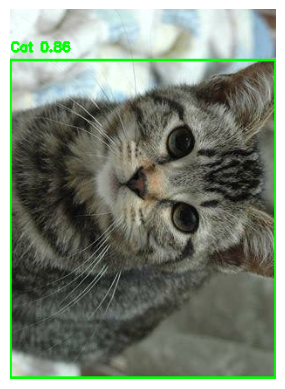

In [17]:
image_path = r'D:\Deep Learning\deep l\dataset\train\cat\augmented_image_619.jpg'  # Replace with your image path
results = detect_cats(image_path)


image 1/1 D:\New folder (2)\dog\dogs_000.jpg: 448x640 1 dog, 90.7ms
Speed: 4.0ms preprocess, 90.7ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)
No cats detected.


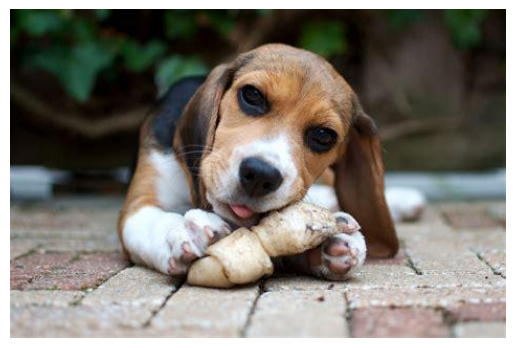

In [13]:
image_path = r'D:\New folder (2)\dog\dogs_000.jpg'  # Replace with your image path
results = detect_cats(image_path)


image 1/1 D:\Deep Learning\deep l\dataset\train\cat\augmented_image_619.jpg: 640x480 1 cat, 1 bed, 100.1ms
Speed: 5.4ms preprocess, 100.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


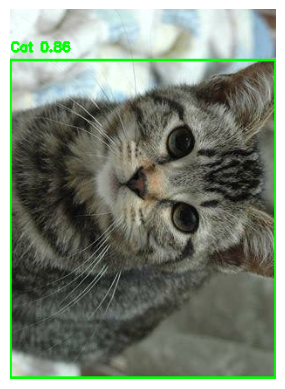